# Random Latitude Longitude Generator

In [73]:
%matplotlib inline
import time
import random
import mplleaflet
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt
from shapely.geometry import shape
# from geopandas.tools import sjoin
# import fiona
# import os
plt.rcParams['figure.figsize'] = [16, 9]

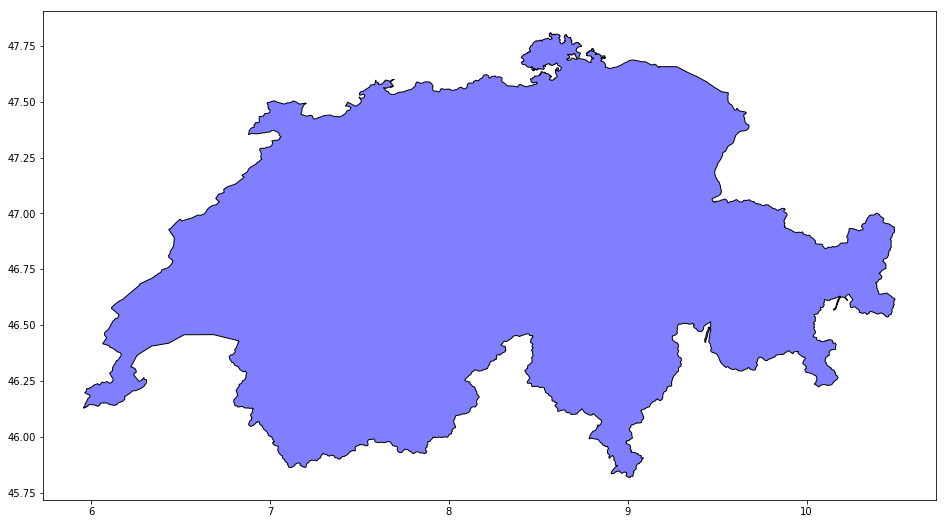

In [74]:
path = "C:/Users/Neil Bardhan/Desktop/Learn Python/GIS/Switzerland"
swiss = gpd.read_file(path + '/shapefiles/CHE_adm0.shp')
fig, ax = plt.subplots(1)
base = swiss.plot(ax = ax, color = 'blue')

In [75]:
mplleaflet.show(fig = ax.figure, crs = swiss.crs, tiles = 'cartodb_positron', path = 'swissMap.html')

In [76]:
%%HTML
<iframe width="100%" height="600" src="swissMap.html"></iframe>

In [77]:
for i in range(len(swiss)):    
    bounds = shape(swiss.loc[i, 'geometry']).bounds
    x1, y1 = bounds[0], bounds[1]
    x2, y2 = bounds[-2],bounds[-1]

pointList = [geometry.Point(x1, y1), geometry.Point(x2,y1), geometry.Point(x2, y2), geometry.Point(x1, y2)]
# print(pointList)
poly = geometry.Polygon([[p.x, p.y] for p in pointList])

corners = gpd.GeoSeries(poly)
corners = gpd.GeoSeries({"geometry": poly})
corners.crs = {'init': 'epsg:4326'}
corners.plot(ax = base, marker = "o", mfc = "black",
             markersize = 4, markeredgecolor = "black",
             alpha = 0.5, color = "white")
mplleaflet.show(fig = ax.figure, crs = swiss.crs, tiles = 'cartodb_positron', path = 'swissBoxMap0.html')

<Figure size 1152x648 with 0 Axes>

In [78]:
%%HTML
<iframe width="100%" height="600" src="swissBoxMap0.html"></iframe>

In [79]:
numPoints = 1000

pts = []
start = time.time()
for i in range(numPoints):
    x = random.uniform(x1, x2)
    y = random.uniform(y1, y2)
    pt = geometry.Point(x, y)
    pnt = pt
    pts.append(pnt)
    pt = gpd.GeoSeries(pt)
    pt.plot(ax = base, marker = "x",
            markersize = 5,
            markeredgecolor = "red", alpha = 0.5)
stop = time.time()
print("Time elapsed ->", round(stop - start, 2), "seconds.")
mplleaflet.show(fig = ax.figure, crs = swiss.crs, tiles = 'cartodb_positron', path = 'swissBoxMap0.html')

Time elapsed -> 5.27 seconds.


<Figure size 1152x648 with 0 Axes>

In [80]:
%%HTML
<iframe width="100%" height="600" src="swissBoxMap0.html"></iframe>

In [81]:
for pnt in pts:
    if pnt.within(shape(swiss.loc[0, 'geometry'])):
#         pts.append(pt)
        pt = gpd.GeoSeries(pnt)
        pt.plot(ax = base, marker = "x",
                  markersize = 5,
                  markeredgecolor = "green", alpha = 0.5)
mplleaflet.show(fig = ax.figure, crs = swiss.crs, tiles = 'cartodb_positron', path = 'swissBoxMap0.html')

<Figure size 1152x648 with 0 Axes>

In [82]:
%%HTML
<iframe width="100%" height="600" src="swissBoxMap0.html"></iframe>